In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('reliance_final_news.csv')

In [7]:
df

,date,headline,news,pdf-pill-label (2),text-nowrap,endless_more href,endless_more,minorchange (6),minorchange (7),minorchange (8),...,card-block (7),card-block (8),card-block (9),card-block (10),card-block (11),card-block (12),card-title,card-block (50),card-block (51),gr href
0,"14 Oct 2024, 12:14PM","Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"14 Oct 2024, 11:46AM",Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"14 Oct 2024, 09:32AM","RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"14 Oct 2024, 08:46AM",Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11 Oct 2024,RELIANCE INDUSTRIES LTD. - 500325 - Compliance...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,20 Sep 2017,Press Release / Media Release,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4606,17 Sep 2017,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4607,NaN,NaN,NaN,NaN,NaN,https://trendlyne.com/latest-news/1127/RELIANC...,more,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4608,15 Sep 2017,Analyst / Investor Meet - Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
columns = ['date' , 'headline' , 'news']

In [9]:
df = df[columns]

In [10]:
df['news'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4610 entries, 0 to 4609
Series name: news
Non-Null Count  Dtype 
--------------  ----- 
2172 non-null   object
dtypes: object(1)
memory usage: 36.1+ KB


In [11]:
df.count()

date        4205
headline    3791
news        2172
dtype: int64

In [12]:
df = df.dropna()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM , Dense , Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

# import optuna 
from transformers import AutoTokenizer ,AutoModelForSequenceClassification
import torch 
import re 
from nltk.corpus import stopwords , wordnet
from nltk.tokenize import word_tokenize
import nltk 
import yfinance as yf
from nltk.stem import WordNetLemmatizer

In [14]:
#Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [Errno 11001] getaddrinfo failed>


False

In [15]:
# text preprocessing function

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '' ,text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
df['clean_headline'] = df['headline'].apply(preprocess_text)
df['clean_news'] = df['news'].apply(preprocess_text)

print(df[['headline','clean_headline']].head())

                                            headline  \
0  Q2 Results Live Updates: RIL, HCLTech Among Ke...   
1  Jio Prepaid Recharge Plans: Check Latest Recha...   
2  RIL Q2 preview: Refining weighs on profits, Ji...   
3  Mukesh Ambani's Reliance Industries eyeing a s...   
5  Reliance Industries Q2 Preview: Weak O2C Segme...   

                                      clean_headline  
0  q results live updates ril hcltech among key e...  
1  jio prepaid recharge plans check latest rechar...  
2  ril q preview refining weighs profits jio reta...  
3  mukesh ambanis reliance industries eyeing slic...  
5  reliance industries q preview weak oc segment ...  


In [16]:
df.sample(5)

,date,headline,news,clean_headline,clean_news
2838,24 Aug 2020,"Jio Rs 499, Rs 777 prepaid plans offer free IP...","Jio, in its Rs 499 Cricket prepaid plan, is of...",jio rs rs prepaid plans offer free ipl streami...,jio rs cricket prepaid plan offering year subs...
490,05 Jan 2024,Reliance Industries-Analysts maintain bullish ...,Outlook 2024- Reliance Industries share price ...,reliance industriesanalysts maintain bullish o...,outlook reliance industries share price seen g...
2869,04 Aug 2020,"Covid-19: From RIL, to Tata Projects, India In...","RIL, JSW, and Tata Projects, among others, tes...",covid ril tata projects india inc goes antibod...,ril jsw tata projects among others testing emp...
2324,11 Jun 2021,Reliance Jio introduces 5 new 'no daily limit'...,The new plans listed on the website start from...,reliance jio introduces new daily limit prepai...,new plans listed website start rs days validit...
2309,22 Jun 2021,Adani group stocks surge for second day in a row,"In the past year, shares of Adani Group firms ...",adani group stocks surge second day row,past year shares adani group firms soared cata...


In [17]:
df.isna().sum()

date              0
headline          0
news              0
clean_headline    0
clean_news        0
dtype: int64

In [18]:
clean_df= df.dropna(subset = 'date')

In [19]:
clean_df

,date,headline,news,clean_headline,clean_news
0,"14 Oct 2024, 12:14PM","Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...
1,"14 Oct 2024, 11:46AM",Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...
2,"14 Oct 2024, 09:32AM","RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...
3,"14 Oct 2024, 08:46AM",Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...
5,11 Oct 2024,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...
...,...,...,...,...,...
4600,24 Sep 2017,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...
4601,22 Sep 2017,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...
4603,21 Sep 2017,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...
4606,17 Sep 2017,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...


In [20]:
df

,date,headline,news,clean_headline,clean_news
0,"14 Oct 2024, 12:14PM","Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...
1,"14 Oct 2024, 11:46AM",Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...
2,"14 Oct 2024, 09:32AM","RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...
3,"14 Oct 2024, 08:46AM",Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...
5,11 Oct 2024,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...
...,...,...,...,...,...
4600,24 Sep 2017,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...
4601,22 Sep 2017,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...
4603,21 Sep 2017,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...
4606,17 Sep 2017,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...


In [21]:
from datetime import datetime 
def convert_datetime(date_str):
    try:
        date_obj = datetime.strptime(date_str, '%d %b %Y, %I:%M%p')
        # the spacing done in this is very  important '%d %b %Y, %I:%M%p'
    except ValueError:
        date_obj = datetime.strptime(date_str , '%d %b %Y')
    return date_obj.strftime('%m/%d/%y')

In [22]:
clean_df['date'] = clean_df['date'].apply(convert_datetime)

In [23]:
clean_df

,date,headline,news,clean_headline,clean_news
0,10/14/24,"Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...
1,10/14/24,Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...
2,10/14/24,"RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...
3,10/14/24,Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...
5,10/11/24,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...
...,...,...,...,...,...
4600,09/24/17,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...
4601,09/22/17,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...
4603,09/21/17,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...
4606,09/17/17,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...


In [24]:
clean_df['final_news'] = clean_df['headline'].combine_first(clean_df['news']) 

In [25]:
clean_df

,date,headline,news,clean_headline,clean_news,final_news
0,10/14/24,"Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...,"Q2 Results Live Updates: RIL, HCLTech Among Ke..."
1,10/14/24,Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...,Jio Prepaid Recharge Plans: Check Latest Recha...
2,10/14/24,"RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...,"RIL Q2 preview: Refining weighs on profits, Ji..."
3,10/14/24,Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...,Mukesh Ambani's Reliance Industries eyeing a s...
5,10/11/24,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...,Reliance Industries Q2 Preview: Weak O2C Segme...
...,...,...,...,...,...,...
4600,09/24/17,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...,Weekly Trading Guide
4601,09/22/17,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...,Reliance to deliver 6 mn JioPhones in 15 days ...
4603,09/21/17,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...,JioPhonedeliveries likely to start over weekend
4606,09/17/17,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...,RIL reverses lower from a key resistance


In [26]:
clean_df.drop(['headline', 'news'], axis =1 , inplace = True)

In [27]:
clean_df.isna().sum()

date              0
clean_headline    0
clean_news        0
final_news        0
dtype: int64

In [28]:
clean_df.dropna(inplace = True)

In [29]:
clean_df

,date,clean_headline,clean_news,final_news
0,10/14/24,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...,"Q2 Results Live Updates: RIL, HCLTech Among Ke..."
1,10/14/24,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...,Jio Prepaid Recharge Plans: Check Latest Recha...
2,10/14/24,ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...,"RIL Q2 preview: Refining weighs on profits, Ji..."
3,10/14/24,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...,Mukesh Ambani's Reliance Industries eyeing a s...
5,10/11/24,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...,Reliance Industries Q2 Preview: Weak O2C Segme...
...,...,...,...,...
4600,09/24/17,weekly trading guide,ril hovers key nearterm support ril reversed s...,Weekly Trading Guide
4601,09/22/17,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...,Reliance to deliver 6 mn JioPhones in 15 days ...
4603,09/21/17,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...,JioPhonedeliveries likely to start over weekend
4606,09/17/17,ril reverses lower key resistance,ril surged per cent last week tested resistanc...,RIL reverses lower from a key resistance


In [30]:
clean_df['date'] = pd.to_datetime(clean_df['date'], format = '%m/%d/%y')

In [31]:
clean_df.sort_values(by = 'date' , inplace = True )

In [32]:
clean_df = clean_df.groupby('date')['final_news'].apply(lambda x : ' '.join(x)).reset_index()

In [33]:
clean_df

,date,final_news
0,2017-09-14,IUC subsidising incumbent operators: Reliance Jio
1,2017-09-17,RIL reverses lower from a key resistance
2,2017-09-21,JioPhonedeliveries likely to start over weekend
3,2017-09-22,Reliance to deliver 6 mn JioPhones in 15 days ...
4,2017-09-24,Weekly Trading Guide
...,...,...
1426,2024-10-08,Oil And Gas Q2 Earnings Preview - To Be A Mixe...
1427,2024-10-09,Q2 result preview: O2C business may drag RIL t...
1428,2024-10-10,"Forbes 2024: Ambani leads, Adani gains big, In..."
1429,2024-10-11,Reliance Industries Q2 Preview: Weak O2C Segme...


In [34]:
clean_df

,date,final_news
0,2017-09-14,IUC subsidising incumbent operators: Reliance Jio
1,2017-09-17,RIL reverses lower from a key resistance
2,2017-09-21,JioPhonedeliveries likely to start over weekend
3,2017-09-22,Reliance to deliver 6 mn JioPhones in 15 days ...
4,2017-09-24,Weekly Trading Guide
...,...,...
1426,2024-10-08,Oil And Gas Q2 Earnings Preview - To Be A Mixe...
1427,2024-10-09,Q2 result preview: O2C business may drag RIL t...
1428,2024-10-10,"Forbes 2024: Ambani leads, Adani gains big, In..."
1429,2024-10-11,Reliance Industries Q2 Preview: Weak O2C Segme...


In [35]:
clean_df.sample()

,date,final_news
31,2017-11-13,"Crude shock, Jio jolt: Reliance Industries los..."


In [36]:
clean_df.isna().sum()

date          0
final_news    0
dtype: int64

In [37]:
clean_df['final_news']= clean_df['final_news'].str.lower()

In [38]:
clean_df

,date,final_news
0,2017-09-14,iuc subsidising incumbent operators: reliance jio
1,2017-09-17,ril reverses lower from a key resistance
2,2017-09-21,jiophonedeliveries likely to start over weekend
3,2017-09-22,reliance to deliver 6 mn jiophones in 15 days ...
4,2017-09-24,weekly trading guide
...,...,...
1426,2024-10-08,oil and gas q2 earnings preview - to be a mixe...
1427,2024-10-09,q2 result preview: o2c business may drag ril t...
1428,2024-10-10,"forbes 2024: ambani leads, adani gains big, in..."
1429,2024-10-11,reliance industries q2 preview: weak o2c segme...


In [39]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1431 non-null   datetime64[ns]
 1   final_news  1431 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 22.5+ KB


In [40]:
# remove html tag 
import string , time

In [41]:

class prepocessing:
        def __init__(self , inputs):
            self.inputs  = inputs

        def html_tags(self):
            pattern = re.compile('<.*?>') 
            self.inputs =  pattern.sub(r'',self.inputs)
            return self
        def link(self):
            pattern = re.compile(r'https?://\S+|www\.\S+')
            self.inputs = pattern.sub(r'',self.inputs)
            return self

        def remove_punc(self):
            exclude = string.punctuation
            self.inputs = self.inputs.translate(str.maketrans('','',exclude))
            return self

        def remstop(self):
            self.inputs = self.inputs.lower()
            new_text = []
            for input in self.inputs.split():
                if input in stopwords.words('english'):
                    new_text.append('')
                else:
                    new_text.append(input)

            x = new_text[:]
            new_text.clear()
            self.inputs = " ".join(x)
            return self

        def get_result(self):
            return self.inputs            

In [42]:
clean_df['final_news'] = clean_df['final_news'].apply(lambda x : prepocessing(x).html_tags().link().remove_punc().remstop().get_result())

In [43]:
print(clean_df['final_news'])     

0        iuc subsidising incumbent operators reliance jio
1                     ril reverses lower   key resistance
2               jiophonedeliveries likely  start  weekend
3       reliance  deliver 6 mn jiophones  15 days star...
4                                    weekly trading guide
                              ...                        
1426    oil  gas q2 earnings preview    mixed quarter ...
1427    q2 result preview o2c business may drag ril  a...
1428    forbes 2024 ambani leads adani gains big india...
1429    reliance industries q2 preview weak o2c segmen...
1430    mukesh ambanis reliance industries eyeing  sli...
Name: final_news, Length: 1431, dtype: object


In [44]:
# STEMMING

In [45]:
from nltk.stem.porter import PorterStemmer

In [46]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [47]:
def lemmatizer(text):    
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    output = ' '.join([lemmatizer.lemmatize(word , get_wordnet_pos(pos)) for word,pos in pos_tags])
    return output

In [48]:
# clean_df['final_news'] = clean_df['final_news'].apply(stem_words)

In [49]:
clean_df['final_news'] = clean_df['final_news'].apply(lemmatizer)

In [50]:
clean_df['final_news']

0           iuc subsidise incumbent operator reliance jio
1                           ril revers low key resistance
2                 jiophonedeliveries likely start weekend
3       reliance deliver 6 mn jiophones 15 day start s...
4                                    weekly trading guide
                              ...                        
1426    oil gas q2 earnings preview mixed quarter dola...
1427    q2 result preview o2c business may drag ril an...
1428    forbes 2024 ambani lead adani gain big india r...
1429    reliance industry q2 preview weak o2c segment ...
1430    mukesh ambanis reliance industry eye slice kar...
Name: final_news, Length: 1431, dtype: object

In [51]:
clean_df

,date,final_news
0,2017-09-14,iuc subsidise incumbent operator reliance jio
1,2017-09-17,ril revers low key resistance
2,2017-09-21,jiophonedeliveries likely start weekend
3,2017-09-22,reliance deliver 6 mn jiophones 15 day start s...
4,2017-09-24,weekly trading guide
...,...,...
1426,2024-10-08,oil gas q2 earnings preview mixed quarter dola...
1427,2024-10-09,q2 result preview o2c business may drag ril an...
1428,2024-10-10,forbes 2024 ambani lead adani gain big india r...
1429,2024-10-11,reliance industry q2 preview weak o2c segment ...


In [52]:
# GETTING STOCK DATA

In [84]:
import yfinance as yf

stock_symbol = 'RELIANCE.NS'
start_date = '2017-09-14'
end_date = '2024-10-14'


# fetch stock data 
reliance_data = yf.download(stock_symbol , start = start_date , end = end_date, auto_adjust=False)

print(reliance_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS   
Date                                                                     
2017-09-14  374.243439  385.779816  393.848816  384.934082  391.242981   
2017-09-15  373.334320  384.842651  389.894318  381.619629  384.934082   
2017-09-18  374.997406  386.557007  389.071442  385.436951  388.591400   
2017-09-19  371.915100  383.379700  388.019958  382.648254  387.997101   
2017-09-20  375.707001  387.288483  398.877655  386.351288  391.380127   

Price           Volume  
Ticker     RELIANCE.NS  
Date                    
2017-09-14    11867640  
2017-09-15    28595395  
2017-09-18     5061995  
2017-09-19     7718697  
2017-09-20    24942703  


In [85]:
reliance_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2017-09-14,374.243439,385.779816,393.848816,384.934082,391.242981,11867640
2017-09-15,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2017-09-18,374.997406,386.557007,389.071442,385.436951,388.591400,5061995
2017-09-19,371.915100,383.379700,388.019958,382.648254,387.997101,7718697
2017-09-20,375.707001,387.288483,398.877655,386.351288,391.380127,24942703
...,...,...,...,...,...,...
2024-10-07,1370.724976,1370.724976,1396.500000,1361.375000,1393.500000,22181340
2024-10-08,1397.349976,1397.349976,1401.000000,1365.099976,1372.974976,17020808


In [86]:
reliance_data.reset_index(inplace=True)

In [87]:
reliance_data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2017-09-14,374.243439,385.779816,393.848816,384.934082,391.242981,11867640
1,2017-09-15,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2,2017-09-18,374.997406,386.557007,389.071442,385.436951,388.591400,5061995
3,2017-09-19,371.915100,383.379700,388.019958,382.648254,387.997101,7718697
4,2017-09-20,375.707001,387.288483,398.877655,386.351288,391.380127,24942703
...,...,...,...,...,...,...,...
1742,2024-10-07,1370.724976,1370.724976,1396.500000,1361.375000,1393.500000,22181340
1743,2024-10-08,1397.349976,1397.349976,1401.000000,1365.099976,1372.974976,17020808
1744,2024-10-09,1374.599976,1374.599976,1400.974976,1372.500000,1397.525024,14310610


In [88]:
date_range = pd.date_range(start='2017-09-14', end='2024-10-14', freq='D')

In [89]:
reliance_data = reliance_data.set_index('Date')

In [90]:
reliance_resampled = reliance_data.reindex(date_range , method = 'ffill')

In [91]:
reliance_resampled

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
2017-09-14,374.243439,385.779816,393.848816,384.934082,391.242981,11867640
2017-09-15,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2017-09-16,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2017-09-17,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2017-09-18,374.997406,386.557007,389.071442,385.436951,388.591400,5061995
...,...,...,...,...,...,...
2024-10-10,1371.050049,1371.050049,1386.000000,1369.425049,1380.025024,22358646
2024-10-11,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122
2024-10-12,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122


In [92]:
reliance_resampled.reset_index(inplace = True)

In [93]:
reliance_resampled.columns = reliance_resampled.columns.droplevel(1)

In [94]:
reliance_resampled

Price,index,Adj Close,Close,High,Low,Open,Volume
0,2017-09-14,374.243439,385.779816,393.848816,384.934082,391.242981,11867640
1,2017-09-15,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2,2017-09-16,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
3,2017-09-17,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
4,2017-09-18,374.997406,386.557007,389.071442,385.436951,388.591400,5061995
...,...,...,...,...,...,...,...
2583,2024-10-10,1371.050049,1371.050049,1386.000000,1369.425049,1380.025024,22358646
2584,2024-10-11,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122
2585,2024-10-12,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122
2586,2024-10-13,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122


In [95]:
reliance_resampled.rename(columns = {'index' : 'date'} , inplace = True )

In [96]:
reliance_resampled

Price,date,Adj Close,Close,High,Low,Open,Volume
0,2017-09-14,374.243439,385.779816,393.848816,384.934082,391.242981,11867640
1,2017-09-15,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
2,2017-09-16,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
3,2017-09-17,373.334320,384.842651,389.894318,381.619629,384.934082,28595395
4,2017-09-18,374.997406,386.557007,389.071442,385.436951,388.591400,5061995
...,...,...,...,...,...,...,...
2583,2024-10-10,1371.050049,1371.050049,1386.000000,1369.425049,1380.025024,22358646
2584,2024-10-11,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122
2585,2024-10-12,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122
2586,2024-10-13,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122


In [97]:
final_data = pd.merge(reliance_resampled ,clean_df , on = 'date' ,how = 'left')

In [98]:
final_data

,date,Adj Close,Close,High,Low,Open,Volume,final_news
0,2017-09-14,374.243439,385.779816,393.848816,384.934082,391.242981,11867640,iuc subsidise incumbent operator reliance jio
1,2017-09-15,373.334320,384.842651,389.894318,381.619629,384.934082,28595395,NaN
2,2017-09-16,373.334320,384.842651,389.894318,381.619629,384.934082,28595395,NaN
3,2017-09-17,373.334320,384.842651,389.894318,381.619629,384.934082,28595395,ril revers low key resistance
4,2017-09-18,374.997406,386.557007,389.071442,385.436951,388.591400,5061995,NaN
...,...,...,...,...,...,...,...,...
2583,2024-10-10,1371.050049,1371.050049,1386.000000,1369.425049,1380.025024,22358646,forbes 2024 ambani lead adani gain big india r...
2584,2024-10-11,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122,reliance industry q2 preview weak o2c segment ...
2585,2024-10-12,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122,NaN
2586,2024-10-13,1372.099976,1372.099976,1383.275024,1368.824951,1370.000000,7980122,NaN


In [99]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2588 non-null   datetime64[ns]
 1   Adj Close   2588 non-null   float64       
 2   Close       2588 non-null   float64       
 3   High        2588 non-null   float64       
 4   Low         2588 non-null   float64       
 5   Open        2588 non-null   float64       
 6   Volume      2588 non-null   int64         
 7   final_news  1431 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 161.9+ KB


In [100]:
final_data['final_news'].fillna('neutral',inplace = True) 

C:\Users\prana\AppData\Local\Temp\ipykernel_3472\1810728002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['final_news'].fillna('neutral',inplace = True)


In [101]:
final_data = final_data[['date','Adj Close','final_news']]

In [102]:
final_data

,date,Adj Close,final_news
0,2017-09-14,374.243439,iuc subsidise incumbent operator reliance jio
1,2017-09-15,373.334320,neutral
2,2017-09-16,373.334320,neutral
3,2017-09-17,373.334320,ril revers low key resistance
4,2017-09-18,374.997406,neutral
...,...,...,...
2583,2024-10-10,1371.050049,forbes 2024 ambani lead adani gain big india r...
2584,2024-10-11,1372.099976,reliance industry q2 preview weak o2c segment ...
2585,2024-10-12,1372.099976,neutral
2586,2024-10-13,1372.099976,neutral


In [103]:
final_data.isna().sum()

date          0
Adj Close     0
final_news    0
dtype: int64

In [104]:
reliance_data.tail(20)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2024-09-13,1472.625000,1472.625000,1483.150024,1469.500000,1476.400024,8711328
2024-09-16,1471.349976,1471.349976,1480.900024,1464.750000,1477.550049,5481774
2024-09-17,1472.300049,1472.300049,1477.474976,1466.625000,1474.000000,5935328
2024-09-18,1463.449951,1463.449951,1482.000000,1460.550049,1470.000000,8574714
2024-09-19,1469.675049,1469.675049,1476.500000,1455.550049,1466.250000,16955902
2024-09-20,1485.925049,1485.925049,1495.000000,1471.375000,1474.000000,30897320
2024-09-23,1493.375000,1493.375000,1501.500000,1488.949951,1491.000000,8832314
2024-09-24,1489.375000,1489.375000,1500.500000,1487.875000,1488.500000,17137444


In [105]:
# pip install transformers torch 

In [106]:
#building Finbert Model 

In [107]:
import pandas as pd
import tensorflow 
import torch
from transformers import BertTokenizer ,BertForSequenceClassification

In [108]:
# SENTIMENTAL ANALYSIS

In [109]:
# perform sentiment analysis using finbert 

In [110]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [111]:
def get_sentiment(text):
    inputs = tokenizer(text , return_tensors = "pt", truncation = True , max_length = 512 ,  padding = True)
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits , dim = -1)
    sentiment_score = probabilities[:,2].item() - probabilities[:,0].item()
    return sentiment_score

In [112]:
# why **inputs and tensor values 

In [113]:
final_data['sentiment'] = final_data['final_news'].apply(get_sentiment)

C:\Users\prana\AppData\Local\Temp\ipykernel_3472\350676023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['sentiment'] = final_data['final_news'].apply(get_sentiment)


In [114]:
final_data['sentiment']

0       0.729402
1       0.757650
2       0.757650
3      -0.222031
4       0.757650
          ...   
2583   -0.531946
2584    0.010182
2585    0.757650
2586    0.757650
2587    0.146521
Name: sentiment, Length: 2588, dtype: float64

In [115]:
final_data = final_data.sort_values('date')

In [116]:
final_data

,date,Adj Close,final_news,sentiment
0,2017-09-14,374.243439,iuc subsidise incumbent operator reliance jio,0.729402
1,2017-09-15,373.334320,neutral,0.757650
2,2017-09-16,373.334320,neutral,0.757650
3,2017-09-17,373.334320,ril revers low key resistance,-0.222031
4,2017-09-18,374.997406,neutral,0.757650
...,...,...,...,...
2583,2024-10-10,1371.050049,forbes 2024 ambani lead adani gain big india r...,-0.531946
2584,2024-10-11,1372.099976,reliance industry q2 preview weak o2c segment ...,0.010182
2585,2024-10-12,1372.099976,neutral,0.757650
2586,2024-10-13,1372.099976,neutral,0.757650


(array([  83.,   50.,   41.,   41.,   55.,  120.,   63.,  127.,  246.,
        1762.]),
 array([-0.92961674, -0.74395445, -0.55829217, -0.37262988, -0.1869676 ,
        -0.00130531,  0.18435697,  0.37001926,  0.55568154,  0.74134383,
         0.92700611]),
 <BarContainer object of 10 artists>)

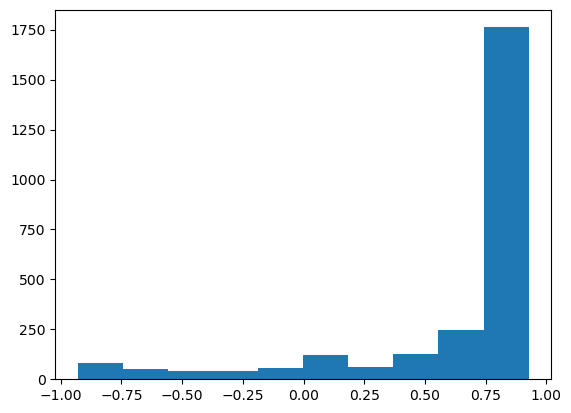

In [117]:
plt.hist(final_data['sentiment'])

In [118]:
final_data['sentiment'].value_counts()

sentiment
 0.757650    1157
 0.740222       2
 0.833176       1
 0.731183       1
 0.499083       1
             ... 
 0.187248       1
-0.404490       1
 0.797022       1
 0.636916       1
 0.146521       1
Name: count, Length: 1431, dtype: int64

In [119]:
final_data = final_data[['date' , 'Adj Close' ,'sentiment']]

In [120]:
final_data

,date,Adj Close,sentiment
0,2017-09-14,374.243439,0.729402
1,2017-09-15,373.334320,0.757650
2,2017-09-16,373.334320,0.757650
3,2017-09-17,373.334320,-0.222031
4,2017-09-18,374.997406,0.757650
...,...,...,...
2583,2024-10-10,1371.050049,-0.531946
2584,2024-10-11,1372.099976,0.010182
2585,2024-10-12,1372.099976,0.757650
2586,2024-10-13,1372.099976,0.757650


In [121]:
final_data.set_index('date' , inplace = True)

In [122]:
final_data

,Adj Close,sentiment
date,,
2017-09-14,374.243439,0.729402
2017-09-15,373.334320,0.757650
2017-09-16,373.334320,0.757650
2017-09-17,373.334320,-0.222031
2017-09-18,374.997406,0.757650
...,...,...
2024-10-10,1371.050049,-0.531946
2024-10-11,1372.099976,0.010182
2024-10-12,1372.099976,0.757650


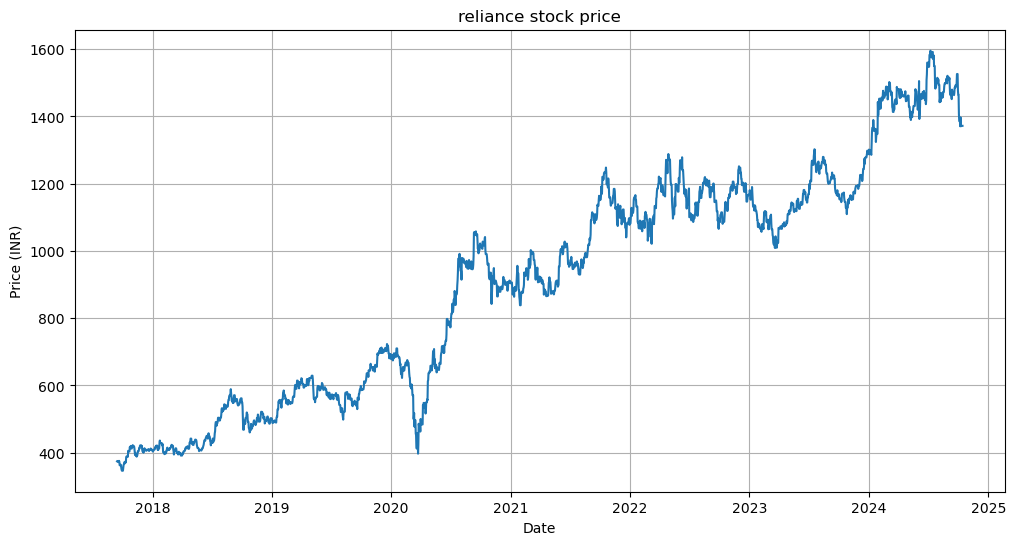

In [123]:
plt.figure(figsize = (12,6))
plt.plot(final_data['Adj Close'])

plt.title('reliance stock price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

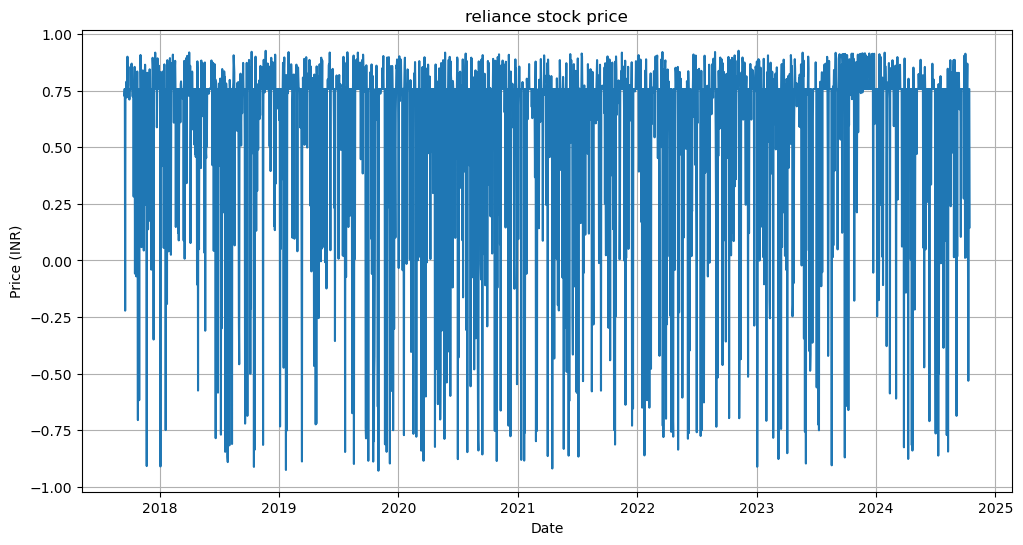

In [124]:
plt.figure(figsize = (12,6))
plt.plot(final_data['sentiment'])

plt.title('reliance stock price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

In [125]:
# SPLITTING THE DATA

In [126]:
train = pd.DataFrame(final_data[0:int(len(final_data['sentiment'])*0.70)])
test = pd.DataFrame(final_data[int(len(final_data['sentiment'])*0.70): int(len(final_data['sentiment']))])

In [127]:
train.shape

(1811, 2)

In [128]:
train

,Adj Close,sentiment
date,,
2017-09-14,374.243439,0.729402
2017-09-15,373.334320,0.757650
2017-09-16,373.334320,0.757650
2017-09-17,373.334320,-0.222031
2017-09-18,374.997406,0.757650
...,...,...
2022-08-25,1206.320679,0.757650
2022-08-26,1199.881226,0.798923
2022-08-27,1199.881226,0.921426


In [129]:
test.shape

(777, 2)

In [130]:
test

,Adj Close,sentiment
date,,
2022-08-30,1209.024780,0.244006
2022-08-31,1209.024780,-0.735375
2022-09-01,1173.482056,0.757650
2022-09-02,1159.778320,0.757650
2022-09-03,1159.778320,0.757650
...,...,...
2024-10-10,1371.050049,-0.531946
2024-10-11,1372.099976,0.010182
2024-10-12,1372.099976,0.757650


In [131]:
scaler = MinMaxScaler(feature_range = (0,1))
train_data = train[['Adj Close' ,'sentiment']].values
test_data = test[['Adj Close' , 'sentiment']].values

In [132]:
train_data

array([[3.74243439e+02, 7.29402319e-01],
       [3.73334320e+02, 7.57649809e-01],
       [3.73334320e+02, 7.57649809e-01],
       ...,
       [1.19988123e+03, 9.21425827e-01],
       [1.19988123e+03, 7.57649809e-01],
       [1.19055444e+03, 5.66148937e-01]])

In [133]:
test_data

array([[ 1.20902478e+03,  2.44005799e-01],
       [ 1.20902478e+03, -7.35374771e-01],
       [ 1.17348206e+03,  7.57649809e-01],
       ...,
       [ 1.37209998e+03,  7.57649809e-01],
       [ 1.37209998e+03,  7.57649809e-01],
       [ 1.37209998e+03,  1.46521330e-01]])

In [134]:
data_training_array = scaler.fit_transform(train_data)
data_testing_array = scaler.transform(test_data)


In [135]:
xtrain = []
ytrain = []

for i in range(100, data_training_array.shape[0]):
    xtrain.append(data_training_array[i - 100 :i])
    ytrain.append(data_training_array[i,0])
xtrain , ytrain = np.array(xtrain) , np.array(ytrain)

In [136]:
xtrain.shape

(1711, 100, 2)

In [137]:
xtrain

array([[[0.02964113, 0.89370869],
        [0.0286759 , 0.90892553],
        [0.0286759 , 0.90892553],
        ...,
        [0.06462672, 0.90892553],
        [0.06217823, 0.90892553],
        [0.06568624, 0.96923035]],

       [[0.0286759 , 0.90892553],
        [0.0286759 , 0.90892553],
        [0.0286759 , 0.38117429],
        ...,
        [0.06217823, 0.90892553],
        [0.06568624, 0.96923035],
        [0.06568624, 0.81774139]],

       [[0.0286759 , 0.90892553],
        [0.0286759 , 0.38117429],
        [0.03044164, 0.90892553],
        ...,
        [0.06568624, 0.96923035],
        [0.06568624, 0.81774139],
        [0.06568624, 0.90892553]],

       ...,

       [[0.83509081, 0.17404385],
        [0.90522574, 0.50384683],
        [0.90522574, 0.90892553],
        ...,
        [0.91682409, 0.90892553],
        [0.91307721, 0.90892553],
        [0.90624029, 0.93115939]],

       [[0.90522574, 0.50384683],
        [0.90522574, 0.90892553],
        [0.90522574, 0.90892553],
        .

In [138]:
ytrain.shape

(1711,)

In [139]:
ytrain

array([0.06568624, 0.06568624, 0.06568624, ..., 0.90624029, 0.90624029,
       0.89633782])

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(128 , return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences = False),
    Dropout(0.2),
    Dense(32),
    Dense(1)
])

model.build(input_shape = (None ,xtrain.shape[1] , xtrain.shape[2]))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,593 (463.25 KB)

 Trainable params: 118,593 (463.25 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
import tensorflow as tf
model.compile(optimizer='adam' , loss = 'mean_squared_error', metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [142]:
history = model.fit(xtrain , ytrain, epochs = 30 , verbose = 1)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0530 - mean_absolute_error: 0.1533
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0033 - mean_absolute_error: 0.0422
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0388
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0375
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0022 - mean_absolute_error: 0.0351
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0025 - mean_absolute_error: 0.0374
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0021 - mean_absolute_error: 0.0334
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0026 - mean_absolute_error: 0.0357
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0018 - mean_absolute_error: 0.0307
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0018 - mean_absolute_error: 0.0317
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 

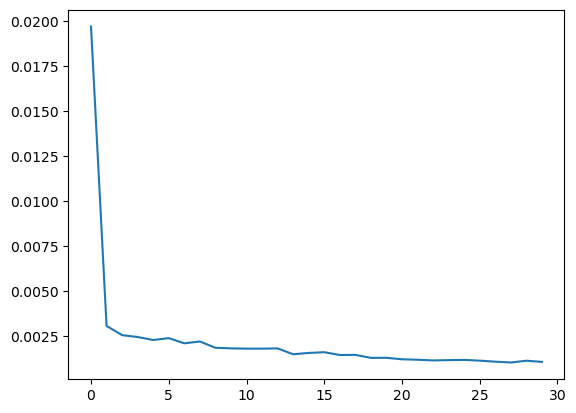

In [143]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])

In [144]:
past_100_days = train[['Adj Close', 'sentiment']][-100:0]
final_df = pd.concat([past_100_days , test[['Adj Close','sentiment']]], ignore_index=True)
input_data = scaler.transform(final_df)

c:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [145]:
xtest = []
ytest = []

for i in range(100 , input_data.shape[0]):
    xtest.append(input_data[i-100:i])
    ytest.append(input_data[i,0])

In [146]:
xtest ,ytest = np.array(xtest) , np.array(ytest)

In [147]:
y_pred = model.predict(xtest)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


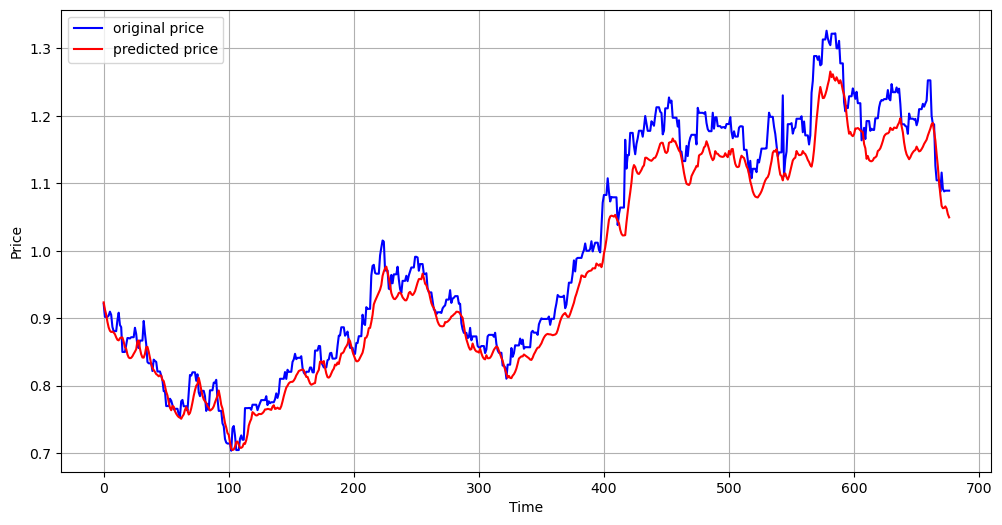

In [148]:
plt.figure(figsize=(12,6))
plt.plot(ytest , 'b' , label = 'original price')
plt.plot(y_pred , 'r' , label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
from sklearn.metrics import accuracy_score , mean_absolute_error , r2_score

In [152]:
mae = mean_absolute_error(ytest , y_pred)
mae

0.032394252241929634

In [153]:
r2 = r2_score(ytest , y_pred)
r2

0.9470833098022715

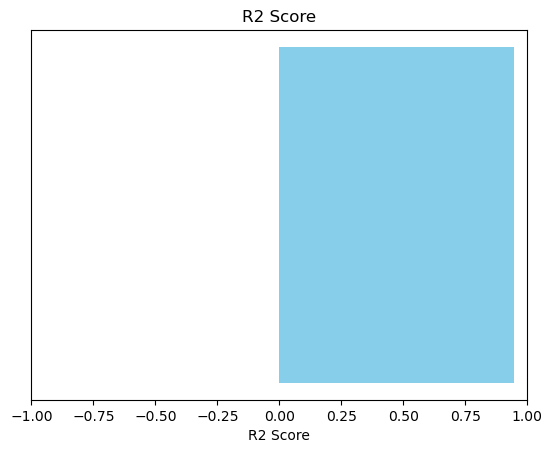

In [154]:
fig ,ax = plt.subplots()
ax.barh(0,r2 , color = 'skyblue')
ax.set_xlim([-1,1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')
plt.show()